# Exploring Weather Trends

## Outline

### Tools

- Step 1 Data extraction <br>
    I use the following `SQL` code to export the dataset from the server
    ```SQL
    SELECT    global_data.year,
              global_data.avg_temp AS g_temp,
              city_data.avg_temp   AS atl_temp     
    FROM      global_data 
    LEFT JOIN city_data 
    ON        city_data.year = global_data.year 
    AND       city_data.city = 'Atlanta';
    ```
- Step 2 Data process <br>
    I use `Python` for data analysis and visualization.
    
### Moving Average

- There are a few NA data points. To calculate the moving average for all periods, I first replace those NA values with their last period values.
- Then I simply calculate the arithmetic mean of last n period:
    $$temp_{t}^{{ma},\, n} = \sum_{\tau = t-n+1}^{t} \dfrac{ temp_{\tau}}{n}$$
    
### Visualization

- Since I need to highlight the trend, I choose a line plot.


## Line Chart

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
!ls

Exploring Weather Trends.ipynb results.csv


In [2]:
df = pd.read_csv("./results.csv", sep=',')

In [3]:
# df.info()

In [4]:
# df.head(10)

In [5]:
# df[df['atl_temp'].isna()]

In [6]:
df = df.fillna(method='ffill')

In [7]:
df2 = pd.DataFrame(index=df['year'], data=df[['atl_temp','g_temp']].values, columns=['ATL','World'])
# df2.head()

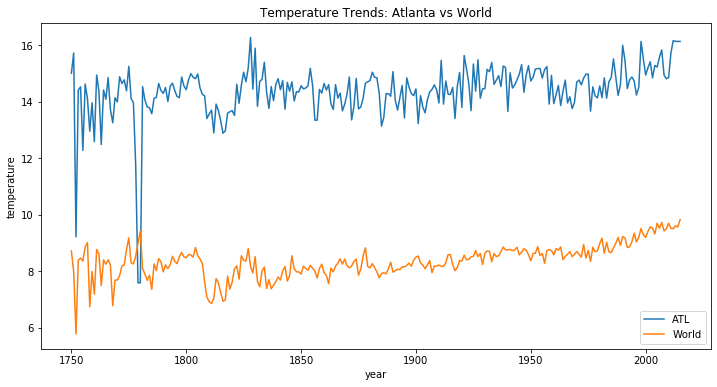

In [8]:
ax = df2.plot(figsize=(12,6))
ax.set(ylabel='temperature', title='Temperature Trends: Atlanta vs World');

In [9]:
# reshape the data for plotting with Seaborn
df_atl = df.iloc[:,[0,1]]
df_atl = df_atl.rename(columns = {'atl_temp':'temperature'})
df_atl['city'] = 'Atlanta'

df_glo = df.iloc[:,[0,2]]
df_glo = df_glo.rename(columns = {'g_temp':'temperature'})
df_glo['city'] = 'World'

df3 = pd.concat([df_atl,df_glo], axis=0)
df3.reset_index(drop=True);

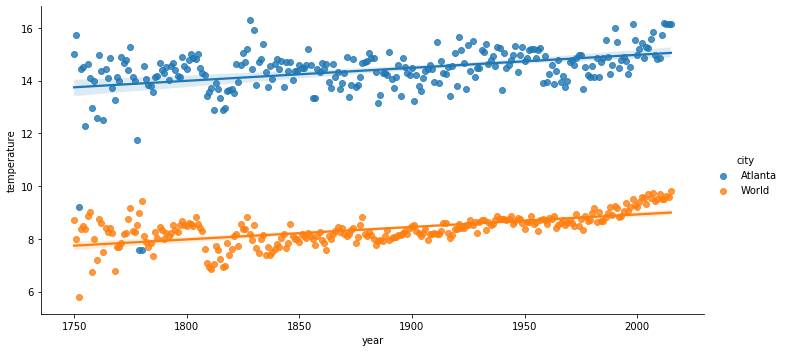

In [10]:
sb.lmplot(x='year', y="temperature", hue='city', data=df3, height=5, aspect=2);

In [16]:
def plot_ma(df, period=7):
    df_ma = df.copy()
    df_ma['ATL']   = df['ATL'].rolling(window=period).mean()
    df_ma['World'] = df['World'].rolling(window=period).mean()
    ax = df_ma.plot(figsize=(12,6))
    ax.set(ylabel='temperature', 
           title='Temperature Trends: Atlanta vs World (Moving Average of {} Years)'.format(period))
    return None

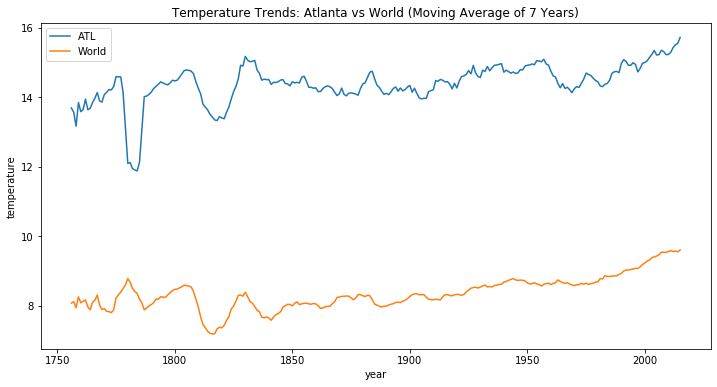

In [17]:
plot_ma(df2, period=7)

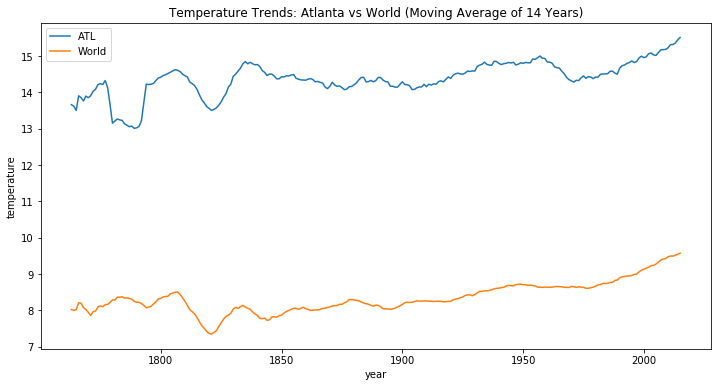

In [18]:
plot_ma(df2, period=14)

## Observations

1. From all plots, we can see that the trends for Atlanta and the world are very similar. The regression lines, which represent the linear trend, are basically parallel.
2. Both are steadily going up, which can probably serve as the evidence of global warming.
3. On average, Atlanta is about 6 degrees warmer than the global average. This gap is pretty stable.
4. For most of the time, the two trends move together.
5. There are some period when the two trend diverge. For example, during the time between 1750 and 1800, the temperature of Atlanta dropped a lot but not the world average. Howevet, this seems to be driven by one or two extreme years.